## Fuel Price Trends & Cost-Saving Analysis - Western Australia

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [43]:
df = pd.read_csv('../Data/Processed_Data/fuel_data_oct_nov_dec_2025.csv')

In [44]:
df.head()

,publish_date,trading_name,brand,fuel_type,price,address,suburb,postcode,area,region,day,month,day_name,weekend
0,2025-11-01,53 Mile Roadhouse,United,ULP,174.9,31 South Western Hwy,PINJARRA,6208,Murray,Peel,1,November,Saturday,True
1,2025-11-01,7-Eleven Alkimos,7-Eleven,ULP,163.9,10 Carlsbad Prom,ALKIMOS,6038,North of River,Metro,1,November,Saturday,True
2,2025-11-01,7-Eleven Ascot,7-Eleven,ULP,169.9,194 Great Eastern Hwy,ASCOT,6104,South of River,Metro,1,November,Saturday,True
3,2025-11-01,7-Eleven Balcatta,7-Eleven,ULP,168.9,174 Balcatta Rd,BALCATTA,6021,North of River,Metro,1,November,Saturday,True
4,2025-11-01,7-Eleven Baldivis,7-Eleven,ULP,169.9,370 Baldivis Rd,BALDIVIS,6171,South of River,Metro,1,November,Saturday,True


### Overall Price Trend
How do fuel prices change over time?

In [45]:
daily_avg = (
    df.groupby("publish_date")["price"]
    .mean()
    .reset_index()
)

In [46]:
daily_avg

,publish_date,price
0,2025-10-01,184.541838
1,2025-10-02,180.629081
2,2025-10-03,177.531096
3,2025-10-04,175.787808
4,2025-10-05,175.661096
...,...,...
79,2025-12-19,176.910555
80,2025-12-20,174.985656
81,2025-12-21,174.441272
82,2025-12-22,173.802436


In [47]:
daily_avg['weekday'] = pd.to_datetime(daily_avg['publish_date']).dt.day_name()

In [70]:
fig = px.line(
    daily_avg,
    x="publish_date",
    y="price",
    title="Average Fuel Price Over Time (ULP)",
    hover_data={
        "publish_date": True,
        "price": ':$.2f',
        "weekday": True
    }
)

fig.show()

### Cheapest Day of the Week

In [13]:
weekday_avg = (
    df.groupby('day_name')['price']
    .mean()
    .sort_values())

In [11]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_avg = weekday_avg.reindex(order)

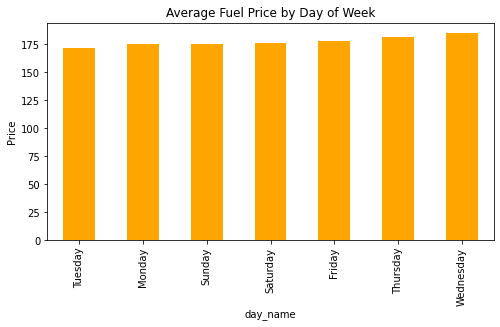

In [113]:
weekday_avg.plot(kind="bar", figsize=(8,4), color='orange', title="Average Fuel Price by Day of Week")
plt.ylabel("Price")
plt.show()

In [72]:
fig = px.line(
    daily_avg,
    x="publish_date",
    y="price",
    color="weekday",
    title="Fuel Price Trends by Weekday",
    labels={
        "price": "Price (cents per litre)",
        "publish_date": "Date",
        "weekday": "Day of Week"
    }
)
fig.show()


Cheapest day for ULP is Tuesday!

### What is the average price difference between Tuesday and Wednesday?

In [50]:
tuesday_ave = daily_avg[daily_avg['weekday'] == 'Tuesday']
tuesday_ave

,publish_date,price,weekday
6,2025-10-07,171.731456,Tuesday
13,2025-10-14,169.335213,Tuesday
20,2025-10-21,169.164649,Tuesday
27,2025-10-28,170.110014,Tuesday
34,2025-11-04,171.261644,Tuesday
41,2025-11-11,172.064344,Tuesday
48,2025-11-18,173.480245,Tuesday
55,2025-11-25,174.143460,Tuesday
62,2025-12-02,173.876495,Tuesday
69,2025-12-09,173.464538,Tuesday


In [51]:
wednesday_ave = daily_avg[daily_avg['weekday'] == 'Wednesday']

In [57]:
diff = wednesday_ave['price'].mean() - tuesday_ave['price'].mean()
print(f"Average price difference between Wednesday and Tuesday: ${diff:.2f}")

Average price difference between Wednesday and Tuesday: $13.01


### Interactive Suburb Plot

### Which suburbs are the most expensive and cheapest on average?

In [114]:
suburb_avg = (
    df.groupby("suburb")
      .agg(
          avg_price=("price", "mean"),
          min_price=("price", "min"),
          max_price=("price", "max"),
          observations=("price", "count")
      )
      .reset_index()
)

In [121]:
top_expensive = suburb_avg.sort_values("avg_price", ascending=False).head(15)

fig = px.bar(
    top_expensive,
    x="avg_price",
    y="suburb",
    orientation="h",
    title="Top 15 Most Expensive Suburbs (Average ULP Price)",
    labels={
        "avg_price": "Average Price (cents per litre)",
        "suburb": "Suburb"
    },
    hover_data={
        "avg_price": ':$.2f',
        "min_price": ':$.2f',
        "max_price": ':$.2f',
        "observations": True
    }
)

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


In [123]:
print(f'Most expensive suburb for ULP price is', subrurb_avg_df.index[-1])

Most expensive suburb for ULP price is FITZROY CROSSING


In [122]:
top_cheap = suburb_avg.sort_values("avg_price", ascending=True).head(15)

fig = px.bar(
    top_cheap,
    x="avg_price",
    y="suburb",
    orientation="h",
    title="Top 15 Most Cheapest Suburbs (Average ULP Price)",
    labels={
        "avg_price": "Average Price (cents per litre)",
        "suburb": "Suburb"
    },
    hover_data={
        "avg_price": ':$.2f',
        "min_price": ':$.2f',
        "max_price": ':$.2f',
        "observations": True
    }
)

fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [124]:
print(f'The Cheapest suburb for ULP price is', subrurb_avg_df.index[0])

The Cheapest suburb for ULP price is OAKFORD


### Price Spread in suburbs

In [128]:
fig = px.scatter(
    suburb_avg,
    x="avg_price",
    y="observations",
    color="max_price",
    hover_name="suburb",
    title="Suburb Price Level vs Number of Observations",
    labels={
        "avg_price": "Average Price (cents per litre)",
        "observations": "Number of Price Records"
    }
)

fig.show()
